In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
 
df=pd.read_csv('Waveform_withoutdupl_norm_v01.csv')  
del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att13,att14,att15,att16,att17,att18,att19,att20,att21,outlier
0,0.323657,0.793785,0.848661,0.660063,0.622244,0.755102,0.760762,0.671655,0.603723,0.636170,...,0.281899,0.203557,0.286607,0.474383,0.352483,0.358857,0.275626,0.465937,0.220884,1
1,0.423803,0.769774,0.632130,0.572471,0.747495,0.670408,0.715232,0.617958,0.637411,0.457447,...,0.302671,0.375494,0.296429,0.383302,0.545278,0.394286,0.451025,0.470803,0.468541,1
2,0.477504,0.580508,0.554133,0.476538,0.851703,0.509184,0.745861,0.785211,0.508865,0.519149,...,0.341246,0.384387,0.229464,0.350095,0.117819,0.406857,0.149203,0.402676,0.370817,1
3,0.645864,0.570621,0.525029,0.631908,0.682365,0.382653,0.478477,0.608275,0.476950,0.190426,...,0.500495,0.555336,0.463393,0.537951,0.564752,0.485714,0.576310,0.518248,0.597055,1
4,0.219158,0.690678,0.530850,0.715328,0.687375,0.571429,0.649007,0.562500,0.523050,0.303191,...,0.190900,0.408103,0.322321,0.425996,0.400195,0.701714,0.515945,0.294404,0.463186,1


In [3]:
# data to values
df = df.values

In [4]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/waveform.json")  
gc = GCForest(config)

In [5]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,21]
X = df[:,0:21]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# count class
len(np.unique(y_train))

2

In [7]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-31 01:33:27,947][cascade_classifier.fit_transform] X_groups_train.shape=[(2410, 21)],y_train.shape=(2410,),X_groups_test.shape=[(1033, 21)],y_test.shape=(1033,)
[ 2018-07-31 01:33:27,948][cascade_classifier.fit_transform] group_dims=[21]
[ 2018-07-31 01:33:27,950][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:27,952][cascade_classifier.fit_transform] group_ends=[21]
[ 2018-07-31 01:33:27,954][cascade_classifier.fit_transform] X_train.shape=(2410, 21),X_test.shape=(1033, 21)
[ 2018-07-31 01:33:27,955][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 21), X_cur_test.shape=(1033, 21)
[ 2018-07-31 01:33:28,536][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.69%
[ 2018-07-31 01:33:29,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:33:30,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:33:36,799][cascade_classifier.transform] X_groups_test.shape=[(1033, 21)]
[ 2018-07-31 01:33:36,800][cascade_classifier.transform] group_dims=[21]
[ 2018-07-31 01:33:36,802][cascade_classifier.transform] X_test.shape=(1033, 21)
[ 2018-07-31 01:33:36,803][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1033, 21)


Test Accuracy of CascadeExtraTrees = 97.289448 %
[[1004    0]
 [  28    1]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99      1004
        1.0       1.00      0.03      0.07        29

avg / total       0.97      0.97      0.96      1033



In [9]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-31 01:33:39,193][cascade_classifier.transform] X_groups_test.shape=[(1033, 21)]
[ 2018-07-31 01:33:39,195][cascade_classifier.transform] group_dims=[21]
[ 2018-07-31 01:33:39,197][cascade_classifier.transform] X_test.shape=(1033, 21)
[ 2018-07-31 01:33:39,198][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1033, 21)


In [10]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [11]:
X_test_new.shape

(1033, 23)

In [12]:
X_train_new.shape

(2410, 23)

In [13]:
# Cascade ExtraTrees
config = load_json("./examples/waveformgc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-31 01:33:41,634][cascade_classifier.fit_transform] X_groups_train.shape=[(2410, 23)],y_train.shape=(2410,),X_groups_test.shape=[(1033, 23)],y_test.shape=(1033,)
[ 2018-07-31 01:33:41,635][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-31 01:33:41,637][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:41,638][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-31 01:33:41,639][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:33:41,640][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)
[ 2018-07-31 01:33:42,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.52%
[ 2018-07-31 01:33:43,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:33:44,262][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [14]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:34:17,895][cascade_classifier.transform] X_groups_test.shape=[(1033, 23)]
[ 2018-07-31 01:34:17,898][cascade_classifier.transform] group_dims=[23]
[ 2018-07-31 01:34:17,899][cascade_classifier.transform] X_test.shape=(1033, 23)
[ 2018-07-31 01:34:17,901][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1033, 23)


Test Accuracy of CascadeExtraTrees = 97.967086 %
[[1003    1]
 [  20    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.90      0.31      0.46        29

avg / total       0.98      0.98      0.97      1033



In [15]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/waveformgc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-31 01:34:20,341][cascade_classifier.fit_transform] X_groups_train.shape=[(2410, 23)],y_train.shape=(2410,),X_groups_test.shape=[(1033, 23)],y_test.shape=(1033,)
[ 2018-07-31 01:34:20,342][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-31 01:34:20,344][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:34:20,345][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-31 01:34:20,346][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:34:20,353][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)
[ 2018-07-31 01:34:21,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:34:22,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:34:23,514][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

[ 2018-07-31 01:34:59,879][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=96.68%
[ 2018-07-31 01:35:00,784][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:35:01,651][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=98.34%
[ 2018-07-31 01:35:02,543][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:35:03,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:35:04,340][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.34%
[ 2018-07-31 01:35:05,262][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.51%
[ 2018-07-31 01:35:06,138][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 0)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '56.047', ' seconds')


[ 2018-07-31 01:35:24,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:35:25,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:35:25,979][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.10%
[ 2018-07-31 01:35:26,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.34%
[ 2018-07-31 01:35:27,720][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:35:28,604][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.76%
[ 2018-07-31 01:35:29,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:35:30,385][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:36:06,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:36:06,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.51%
[ 2018-07-31 01:36:07,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%
[ 2018-07-31 01:36:08,734][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.75%
[ 2018-07-31 01:36:08,974][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.88%
[ 2018-07-31 01:36:08,975][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.87%
[ 2018-07-31 01:36:08,976][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.88%
[ 2018-07-31 01:36:08,978][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.87%
[ 2018-07-31 01:36:08,979][

('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 1)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '63.404', ' seconds')


[ 2018-07-31 01:36:37,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:36:37,931][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:36:38,822][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:36:39,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:36:40,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.51%
[ 2018-07-31 01:36:41,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:36:42,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:36:43,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:37:18,750][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:37:19,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.10%
[ 2018-07-31 01:37:20,520][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.51%
[ 2018-07-31 01:37:21,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.75%
[ 2018-07-31 01:37:21,955][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.76%
[ 2018-07-31 01:37:21,957][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.87%
[ 2018-07-31 01:37:21,958][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.76%
[ 2018-07-31 01:37:21,960][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.87%
[ 2018-07-31 01:37:21,961][

('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 2)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '45.62', ' seconds')


[ 2018-07-31 01:37:27,394][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:37:28,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:37:29,196][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:37:30,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:37:30,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:37:31,895][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.76%
[ 2018-07-31 01:37:32,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:37:33,683][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:38:05,156][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:38:05,157][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 3)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.017', ' seconds')


[ 2018-07-31 01:38:05,842][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:38:06,792][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.34%
[ 2018-07-31 01:38:07,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:38:08,652][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:38:09,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:38:10,389][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.76%
[ 2018-07-31 01:38:11,283][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:38:12,138][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:38:43,841][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:38:43,843][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 4)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.264', ' seconds')


[ 2018-07-31 01:38:44,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:38:45,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:38:46,416][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:38:47,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:38:48,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:38:49,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.76%
[ 2018-07-31 01:38:50,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:38:50,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:39:22,663][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:39:22,665][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 5)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.436', ' seconds')


[ 2018-07-31 01:39:23,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:39:24,250][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:39:25,130][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:39:26,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:39:26,985][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:39:27,879][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.76%
[ 2018-07-31 01:39:28,854][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:39:29,763][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.93%


[ 2018-07-31 01:40:04,979][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.93%
[ 2018-07-31 01:40:05,844][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.51%
[ 2018-07-31 01:40:06,719][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%
[ 2018-07-31 01:40:07,617][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.75%
[ 2018-07-31 01:40:07,859][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.93%
[ 2018-07-31 01:40:07,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.87%
[ 2018-07-31 01:40:07,861][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.93%
[ 2018-07-31 01:40:07,865][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.87%
[ 2018-07-31 01:40:07,867][

('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 6)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '45.219', ' seconds')


[ 2018-07-31 01:40:13,302][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:40:14,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:40:15,136][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:40:16,002][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:40:16,908][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:40:17,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:40:18,719][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:40:19,583][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.93%


[ 2018-07-31 01:40:52,662][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:40:52,664][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 7)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '37.723', ' seconds')


[ 2018-07-31 01:40:53,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:40:54,251][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:40:55,208][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:40:56,088][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:40:56,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:40:57,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:40:58,869][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:40:59,746][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.93%


[ 2018-07-31 01:41:35,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:41:35,913][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.51%
[ 2018-07-31 01:41:36,822][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%
[ 2018-07-31 01:41:37,749][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.75%
[ 2018-07-31 01:41:37,990][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.84%
[ 2018-07-31 01:41:37,991][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.87%
[ 2018-07-31 01:41:37,994][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.84%
[ 2018-07-31 01:41:37,995][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.87%
[ 2018-07-31 01:41:37,996][

('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 8)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '45.348', ' seconds')


[ 2018-07-31 01:41:43,368][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:41:44,285][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:41:45,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:41:46,083][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:41:47,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:41:48,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:41:49,146][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:41:50,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:42:22,161][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:42:22,162][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 9)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '37.134', ' seconds')


[ 2018-07-31 01:42:22,859][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:42:23,745][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:42:24,606][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:42:25,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:42:26,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:42:27,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:42:28,122][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:42:28,986][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:43:00,748][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:43:00,750][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 10)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.206', ' seconds')


[ 2018-07-31 01:43:01,450][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:43:02,337][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:43:03,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.93%
[ 2018-07-31 01:43:04,140][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:43:05,027][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:43:05,933][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:43:06,802][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:43:07,713][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:43:40,340][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:43:40,341][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 11)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '37.209', ' seconds')


[ 2018-07-31 01:43:41,051][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:43:41,992][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:43:42,861][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:43:43,783][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:43:44,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:43:45,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:43:46,600][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:43:47,520][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:44:18,757][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:44:18,759][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 12)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.048', ' seconds')


[ 2018-07-31 01:44:19,498][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:44:20,381][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.51%
[ 2018-07-31 01:44:21,386][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:44:22,297][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:44:23,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:44:24,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:44:24,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:44:25,870][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:44:57,885][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:44:57,887][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 13)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.778', ' seconds')


[ 2018-07-31 01:44:58,583][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:44:59,519][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:45:00,447][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:45:01,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:45:02,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:45:03,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:45:04,098][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:45:05,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:45:36,882][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:45:36,884][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.870281 %', 'Layer :', 14)
[[1003    1]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.89      0.28      0.42        29

avg / total       0.98      0.98      0.97      1033

(' Time ', '36.612', ' seconds')


[ 2018-07-31 01:45:37,876][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-31 01:45:38,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:45:40,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.93%
[ 2018-07-31 01:45:41,524][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.51%
[ 2018-07-31 01:45:42,592][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:45:44,059][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:45:45,263][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:45:46,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:46:23,338][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:46:24,548][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.10%
[ 2018-07-31 01:46:25,822][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%
[ 2018-07-31 01:46:27,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.33%
[ 2018-07-31 01:46:27,305][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.88%
[ 2018-07-31 01:46:27,310][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.77%
[ 2018-07-31 01:46:27,312][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.88%
[ 2018-07-31 01:46:27,313][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.77%
[ 2018-07-31 01:46:27,315][

('Test Accuracy of CascadeExtraTrees = 97.773475 %', 'Layer :', 15)
[[1002    2]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.80      0.28      0.41        29

avg / total       0.97      0.98      0.97      1033

(' Time ', '69.292', ' seconds')


[ 2018-07-31 01:46:56,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.35%
[ 2018-07-31 01:46:57,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:46:58,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-31 01:46:59,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:46:59,894][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:47:00,782][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:47:01,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:47:02,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:47:39,285][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-31 01:47:40,221][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.10%
[ 2018-07-31 01:47:41,076][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.93%
[ 2018-07-31 01:47:41,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.33%
[ 2018-07-31 01:47:42,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.84%
[ 2018-07-31 01:47:42,233][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.77%
[ 2018-07-31 01:47:42,234][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.84%
[ 2018-07-31 01:47:42,236][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.77%
[ 2018-07-31 01:47:42,237][

('Test Accuracy of CascadeExtraTrees = 97.773475 %', 'Layer :', 16)
[[1002    2]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.80      0.28      0.41        29

avg / total       0.97      0.98      0.97      1033

(' Time ', '56.915', ' seconds')


[ 2018-07-31 01:48:00,224][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.35%
[ 2018-07-31 01:48:01,160][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:48:02,078][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.93%
[ 2018-07-31 01:48:02,979][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:48:03,859][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:48:04,750][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:48:05,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:48:06,530][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:48:37,206][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:48:37,207][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.773475 %', 'Layer :', 17)
[[1002    2]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.80      0.28      0.41        29

avg / total       0.97      0.98      0.97      1033

(' Time ', '35.308', ' seconds')


[ 2018-07-31 01:48:37,968][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.35%
[ 2018-07-31 01:48:38,876][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:48:39,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.93%
[ 2018-07-31 01:48:40,801][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.51%
[ 2018-07-31 01:48:41,714][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:48:42,623][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:48:43,529][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:48:44,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


[ 2018-07-31 01:49:15,652][cascade_classifier.fit_transform] X_train.shape=(2410, 23),X_test.shape=(1033, 23)
[ 2018-07-31 01:49:15,653][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2410, 23), X_cur_test.shape=(1033, 23)


('Test Accuracy of CascadeExtraTrees = 97.773475 %', 'Layer :', 18)
[[1002    2]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.80      0.28      0.41        29

avg / total       0.97      0.98      0.97      1033

(' Time ', '36.125', ' seconds')


[ 2018-07-31 01:49:16,298][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.35%
[ 2018-07-31 01:49:17,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.10%
[ 2018-07-31 01:49:18,037][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.93%
[ 2018-07-31 01:49:18,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.51%
[ 2018-07-31 01:49:19,753][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.51%
[ 2018-07-31 01:49:20,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.34%
[ 2018-07-31 01:49:21,734][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.10%
[ 2018-07-31 01:49:22,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.34%


('Test Accuracy of CascadeExtraTrees = 97.773475 %', 'Layer :', 19)
[[1002    2]
 [  21    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1004
        1.0       0.80      0.28      0.41        29

avg / total       0.97      0.98      0.97      1033

(' Time ', '36.616', ' seconds')


('Opt_Cascade_num =', 0, ' Accuracy =', 97.87, 'Time =', 56.049999999999997)


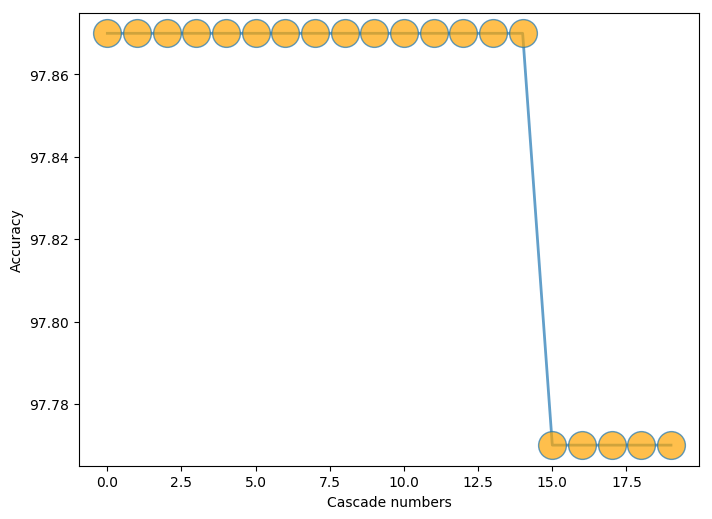

In [16]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [17]:
Accuracy

[97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.87,
 97.77,
 97.77,
 97.77,
 97.77,
 97.77]